# 标签边缘
在处理图像中的生物对象（如细胞和细胞核）时，识别位于对象表面的所有像素可能是有意义的。
本笔记本演示了如何选择细胞核边界上的像素，以防我们想要测量核膜中的强度。

In [2]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread

cl.OCLArray([[20., 17., 17., ..., 28., 23., 20.],
       [23., 26., 18., ..., 23., 30., 20.],
       [16., 22., 16., ..., 31., 22., 42.],
       ...,
       [36., 35., 36., ..., 49., 38., 46.],
       [38., 27., 38., ..., 43., 40., 49.],
       [38., 39., 40., ..., 44., 36., 44.]], dtype=float32)
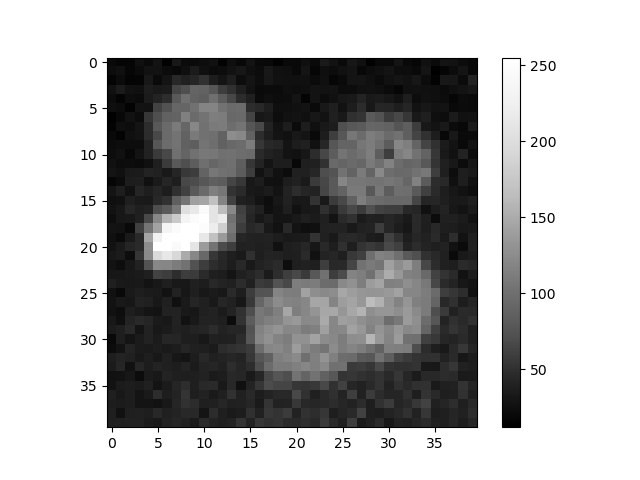
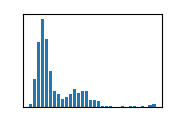

In [21]:
image = cle.asarray(imread("../../data/mitosis_mod.tif")[0:40,25:65])
image

然后我们对细胞核进行分割。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
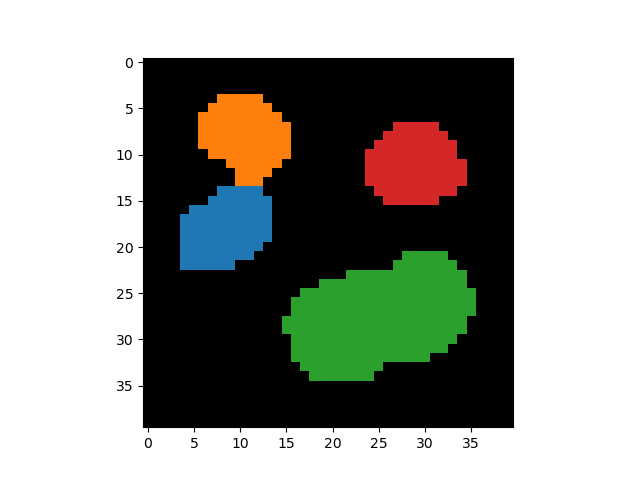

In [27]:
label_image = cle.voronoi_otsu_labeling(image, spot_sigma=2, outline_sigma=1)
label_image

从细胞核标签图像中，我们可以提取另一个标签图像，其中包含位于标签边缘的所有像素。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
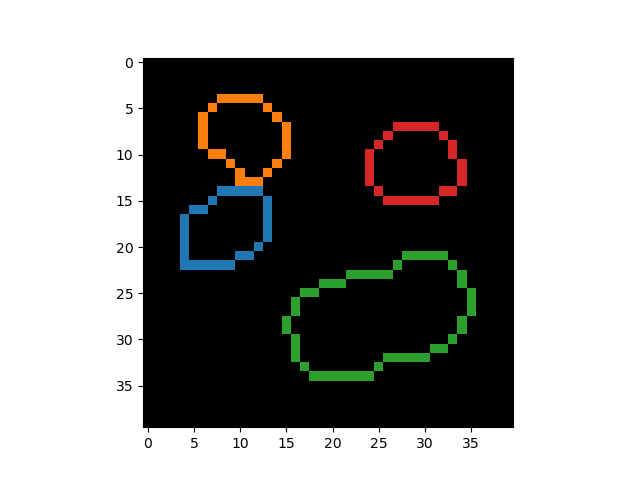

In [28]:
edge_label_image = cle.reduce_labels_to_label_edges(label_image)
edge_label_image

如果想要在边界周围测量更厚的区域，我们可以扩展边界。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
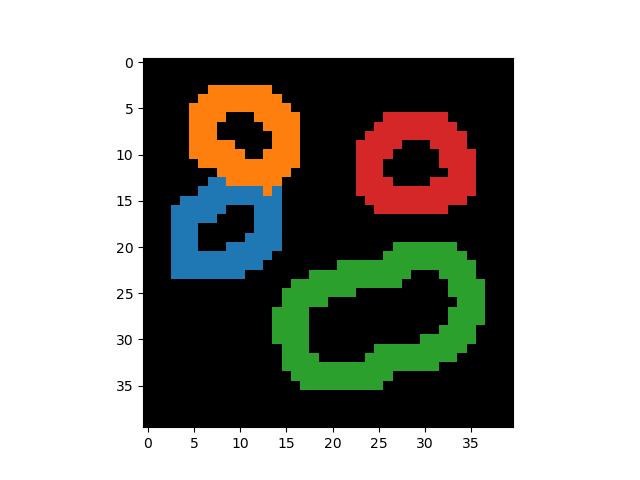

In [31]:
thicker_edges = cle.dilate_labels(edge_label_image, radius=1)
thicker_edges

为了可视化目的，我们还可以查看带有标签边界的原始图像。

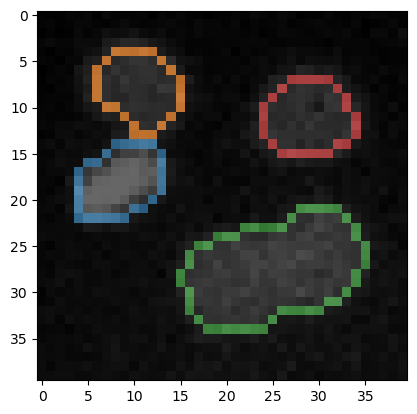

In [34]:
cle.imshow(image, continue_drawing=True)
cle.imshow(edge_label_image, alpha=0.6, labels=True)